# Binary Classification

In this project, the target for classification is the y variable - has the client subscribed a term deposit or not.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
for c in df.columns:
    print(c, df[c].nunique())
    print(df[c].unique()[:12])
    print()

age 77
[58 44 33 47 35 28 42 43 41 29 53 57]

job 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital 3
['married' 'single' 'divorced']

education 4
['tertiary' 'secondary' 'unknown' 'primary']

default 2
['no' 'yes']

balance 7168
[2143   29    2 1506    1  231  447  121  593  270  390    6]

housing 2
['yes' 'no']

loan 2
['no' 'yes']

contact 3
['unknown' 'cellular' 'telephone']

day 31
[ 5  6  7  8  9 12 13 14 15 16 19 20]

month 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration 1573
[261 151  76  92 198 139 217 380  50  55 222 137]

campaign 48
[ 1  2  3  5  4  6  7  8  9 10 11 12]

pdays 559
[ -1 151 166  91  86 143 147  89 140 176 101 174]

previous 41
[ 0  3  1  4  2 11 16  6  5 10 12  7]

poutcome 4
['unknown' 'failure' 'other' 'success']

y 2
['no' 'yes']



In [6]:
chosen_features = ['age', 'job', 'marital', 'education', 'balance', 'housing',
        'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
    

In [7]:
df = df[chosen_features] 

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df['education'].mode()

0    secondary
Name: education, dtype: object

In [10]:
(df.dtypes != object)

age           True
job          False
marital      False
education    False
balance       True
housing      False
contact      False
day           True
month        False
duration      True
campaign      True
pdays         True
previous      True
poutcome     False
y            False
dtype: bool

In [11]:
numerical_features = [ 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [12]:
categorical_features = [ 'job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [13]:
correlation_matrix = df[numerical_features].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [57]:
min_corr_value = correlation_matrix.min().min()
min_corr_value

-0.09304407377294048

In [59]:
min_corr_location = np.where(correlation_matrix == min_corr_value)
min_corr_location

(array([2, 5], dtype=int64), array([5, 2], dtype=int64))

## Target encoding

In [14]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [15]:
df.y[39009:39018]

39009    yes
39010    yes
39011     no
39012     no
39013     no
39014     no
39015     no
39016     no
39017    yes
Name: y, dtype: object

In [16]:
df.y = (df.y== 'yes').astype(int)

In [17]:
df.y[39009:39018]

39009    1
39010    1
39011    0
39012    0
39013    0
39014    0
39015    0
39016    0
39017    1
Name: y, dtype: int32

## Split data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [20]:
len(df_train), len(df_val), len(df_test), len(df_val)+ len(df_test)+len(df_train) == len(df)

(27126, 9042, 9043, True)

In [60]:
y_train = df_train.y.values
y_full_train = df_full_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values


In [22]:
df_full_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

## MI score

In [23]:
from sklearn.metrics import mutual_info_score

In [24]:
def mutual_information_score_series(series):
    return mutual_info_score(series, df_full_train.y)

In [25]:
mi = df_full_train[categorical_features].apply(mutual_information_score_series)
mi.sort_values(ascending=False).round(2)

poutcome     0.03
month        0.02
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

## One-hot encoding

In [26]:
from sklearn.feature_extraction import DictVectorizer

In [27]:

dv = DictVectorizer(sparse=False)
train_dict = df_train[numerical_features + categorical_features].to_dict(orient= 'records')
train_dict[0]

{'age': 32,
 'balance': 1100,
 'day': 11,
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0,
 'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'housing': 'yes',
 'contact': 'cellular',
 'month': 'aug',
 'poutcome': 'unknown'}

In [28]:
X_train = dv.fit_transform(train_dict)

In [29]:
val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [30]:
print(X_train.shape)
print(X_val.shape)

(27126, 47)
(9042, 47)


## Logistic Regression

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [32]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred.shape

(9042,)

In [33]:
X_val.shape

(9042, 47)

In [34]:
y_val.shape

(9042,)

In [35]:
y_decision = (y_pred >= 0.5)
y_decision.shape


(9042,)

In [36]:
base_model_accuracy = ( y_val == y_decision).mean()
base_model_accuracy.round(4)

0.901

In [37]:
y_val.shape, y_pred.shape

((9042,), (9042,))

In [40]:
auc = roc_auc_score(y_val, y_pred)
auc.round(3)

0.911

## Feature elimination technique : finding the least useful feature

In [41]:
accr = {}

X_train_df = pd.DataFrame(X_train, columns=dv.get_feature_names_out())
X_val_df = pd.DataFrame(X_val, columns=dv.get_feature_names_out())

# Find feature groups that share a common prefix (like 'job=')
feature_groups = {}
for feature in X_train_df.columns:
    prefix = feature.split('=')[0]  
    if prefix not in feature_groups:
        feature_groups[prefix] = []
    feature_groups[prefix].append(feature)

for feature_group in feature_groups:
    X_train_subset = X_train_df.drop(columns = feature_groups[feature_group])
    X_val_subset = X_val_df.drop(columns = feature_groups[feature_group])

    model.fit(X_train_subset, y_train)
    y_pred_subset = model.predict_proba(X_val_subset)
    y_decision_i = (y_pred_subset[:,1] >= 0.5)

    accuracy_i = ( y_val == y_decision_i).mean()

    accuracy_diff = (base_model_accuracy - accuracy_i)
    accr[feature_group] = accuracy_diff
    print(f"Accuracy without {feature_group}: {accuracy_i}, Difference: {accuracy_diff}")


Accuracy without age: 0.9010174740101747, Difference: 0.0
Accuracy without balance: 0.9006856890068569, Difference: 0.00033178500331787486
Accuracy without campaign: 0.9006856890068569, Difference: 0.00033178500331787486
Accuracy without contact: 0.9000221190002212, Difference: 0.0009953550099535136
Accuracy without day: 0.9013492590134926, Difference: -0.00033178500331787486
Accuracy without duration: 0.8900685689006856, Difference: 0.010948905109489093
Accuracy without education: 0.9009068790090687, Difference: 0.0001105950011059953
Accuracy without housing: 0.9012386640123866, Difference: -0.00022119000221187957
Accuracy without job: 0.9011280690112807, Difference: -0.0001105950011059953
Accuracy without marital: 0.9011280690112807, Difference: -0.0001105950011059953
Accuracy without month: 0.8999115239991152, Difference: 0.0011059500110595089
Accuracy without pdays: 0.9009068790090687, Difference: 0.0001105950011059953
Accuracy without poutcome: 0.893607608936076, Difference: 0.007

In [42]:
# age is the least important feature

## ROC and AUC

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


age 0.507
balance 0.587
day 0.525
duration 0.807
campaign 0.568
pdays 0.594
previous 0.603


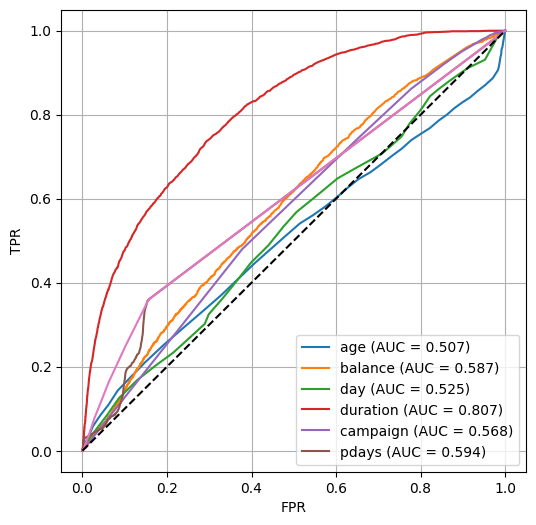

In [49]:
auc_scores={}
plt.figure(figsize =(6,6))

for feature in numerical_features :
    fpr, tpr, thresholds = roc_curve(df_train.y, df_train[feature])
    auc = roc_auc_score(df_train.y, df_train[feature])  
    if auc<0.5:    # if the feature has a negative correlation with y
        fpr, tpr, thresholds = roc_curve(df_train.y, -df_train[feature])
        auc = roc_auc_score(df_train.y, -df_train[feature]) 

    auc_scores[feature] = auc
    print(feature, auc.round(3))

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
    plt.legend()
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Classifier') 


### Precision and Recall

In [45]:
scores = []
thresholds = np.arange(0, 1, 0.01)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 =  (2 * precision * recall)/(precision + recall)
    
    scores.append((t, precision.round(3), recall.round(3), f1.round(3)))
    
scores

[(0.0, 0.118, 1.0, 0.212),
 (0.01, 0.132, 0.998, 0.232),
 (0.02, 0.155, 0.996, 0.268),
 (0.03, 0.182, 0.989, 0.307),
 (0.04, 0.213, 0.981, 0.351),
 (0.05, 0.246, 0.968, 0.392),
 (0.06, 0.279, 0.948, 0.432),
 (0.07, 0.312, 0.928, 0.467),
 (0.08, 0.339, 0.91, 0.494),
 (0.09, 0.361, 0.885, 0.513),
 (0.1, 0.383, 0.869, 0.532),
 (0.11, 0.402, 0.851, 0.546),
 (0.12, 0.417, 0.828, 0.554),
 (0.13, 0.435, 0.811, 0.566),
 (0.14, 0.449, 0.789, 0.572),
 (0.15, 0.46, 0.769, 0.576),
 (0.16, 0.473, 0.751, 0.581),
 (0.17, 0.487, 0.735, 0.586),
 (0.18, 0.496, 0.712, 0.585),
 (0.19, 0.506, 0.695, 0.586),
 (0.2, 0.519, 0.684, 0.59),
 (0.21, 0.526, 0.669, 0.589),
 (0.22, 0.537, 0.657, 0.591),
 (0.23, 0.541, 0.638, 0.586),
 (0.24, 0.548, 0.62, 0.582),
 (0.25, 0.555, 0.611, 0.582),
 (0.26, 0.563, 0.602, 0.582),
 (0.27, 0.566, 0.583, 0.575),
 (0.28, 0.573, 0.566, 0.57),
 (0.29, 0.579, 0.553, 0.566),
 (0.3, 0.579, 0.533, 0.555),
 (0.31, 0.587, 0.526, 0.555),
 (0.32, 0.591, 0.513, 0.549),
 (0.33, 0.594, 0.5, 0

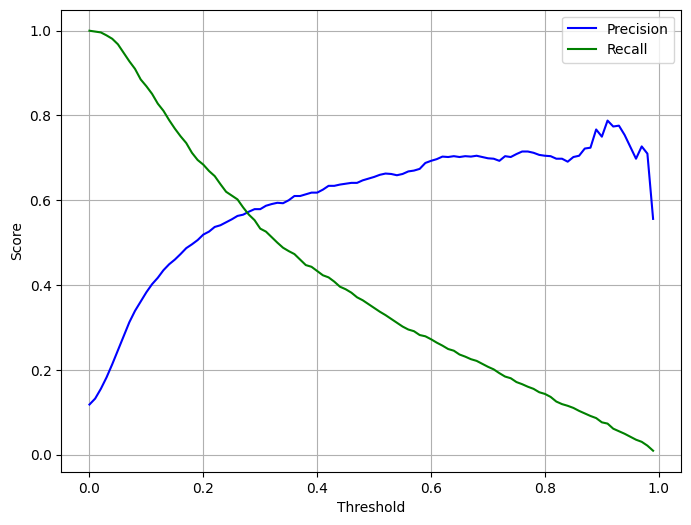

In [47]:
scores = np.array(scores)
precision = scores[:, 1]
recall = scores[:, 2]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision, label="Precision", color='b')
plt.plot(thresholds, recall, label="Recall", color='g')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
columns = ['threshold', 'precision', 'recall', 'f1-score']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores[::10]

In [ ]:
df_scores[['precision', 'recall']]

In [ ]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('threshold')
plt.ylabel('score')
plt.plot(thresholds, df_scores[['precision', 'recall']])
plt.legend()
plt.scatter(x=0.265, y=0.57, c='r', marker= '*')

In [ ]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('threshold')
plt.ylabel('score')
plt.plot(thresholds, df_scores['f1-score'])
plt.legend()
plt.scatter(x=0.22, y=0.6, c='r', marker= '*')

## K-fold Cross Validation
from sklearn.model_selection import KFold


In [50]:
from sklearn.model_selection import KFold

In [51]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
train_idx, val_idx = next(kfold.split(df_full_train)) 

In [52]:
len(train_idx), len(val_idx), len(df_full_train)


(28934, 7234, 36168)

In [69]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

y_train = y_full_train[train_idx]
y_val = y_full_train[val_idx]


In [97]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_features + numerical_features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [71]:
dv, model = train(df_train, y_train, C=0.001)

In [72]:
def predict(df, dv, model):
    dicts = df[categorical_features + numerical_features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [73]:
y_pred = predict(df_val, dv, model)
y_pred.round(3)

array([0.005, 0.077, 0.048, ..., 0.114, 0.046, 0.502])

In [82]:
auc_list =[]

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = y_full_train[train_idx]
    y_val = y_full_train[val_idx]

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    auc_list.append(auc)

mean_auc = np.mean(auc_list)
std_auc = np.std(auc_list)



0.916462439723447 0.9061148129567789 0.007699480264420594


In [84]:
print(auc_list)
print(mean_auc.round(4), std_auc.round(4))


[0.910361651544213, 0.9046770991036455, 0.9059662073370384, 0.8931066670755506, 0.916462439723447]
0.9061 0.0077


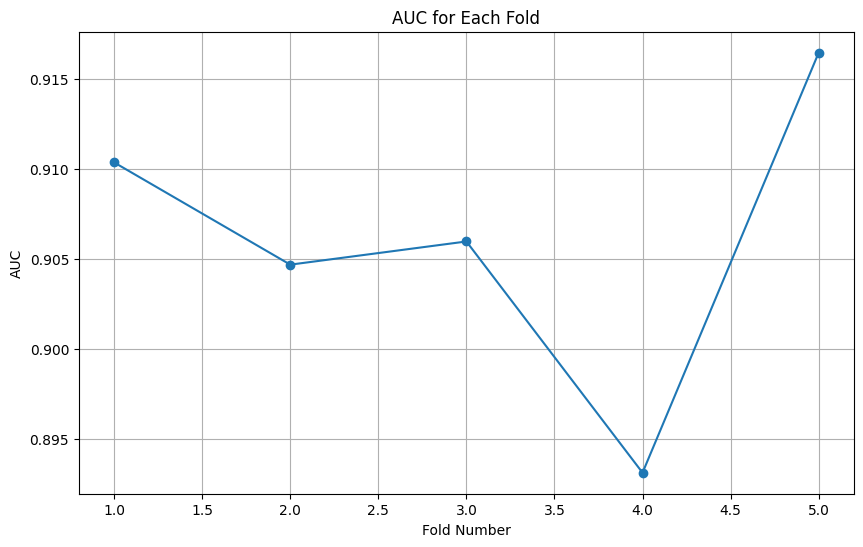

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(auc_list) + 1), auc_list, marker='o')
plt.title('AUC for Each Fold')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.grid()
plt.show()

## Hyperparameter Tuning

In [96]:
from tqdm.auto import tqdm

In [103]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

auc_list= []

for C in tqdm([0.000001, 0.001, 1]):
    auc_list = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        auc_list.append(auc)

    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    print(f'C={C}, mean= {mean_auc.round(3)}, std= {std_auc.round(3)}')

print('Done')

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06, mean= 0.695, std= 0.009
C=0.001, mean= 0.861, std= 0.006
C=1, mean= 0.906, std= 0.008
Done
